# Problem Set 4: Fixed Income

## Task 2: Bond price, yield-to-maturity and duration

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.interpolate import make_interp_spline, BSpline
import statsmodels.api as sm

### d)

In [2]:
#Y_1 = Y + 0.005
#Y_2 = Y - 0.005
#Y_3 = Y * 1.3
#Y_4 = Y * 0.3 + (tau / 4000)

### e)

### f)

## Task 3: Yield curve, etc.

### a)

In [3]:
data_3 = pd.read_csv(r'Data/PS4 - Data 3.csv', delimiter = ';', index_col = 'date')

In [4]:
data_3_latest = data_3.iloc[-1, 2:]
print(data_3_latest)

GVT_1M    -0.800
GVT_2M    -0.800
GVT_3M    -0.800
GVT_1Y    -0.750
GVT_2Y    -0.761
GVT_5Y    -0.637
GVT_10Y   -0.304
GVT_15Y   -0.124
GVT_20Y   -0.041
Name: 15.07.2021, dtype: float64


In [5]:
df_IR = pd.DataFrame(index = [1/12, 1/6, 1/4, 1, 2, 5, 10, 15, 20], columns = ['IR'], data = data_3_latest.to_numpy())

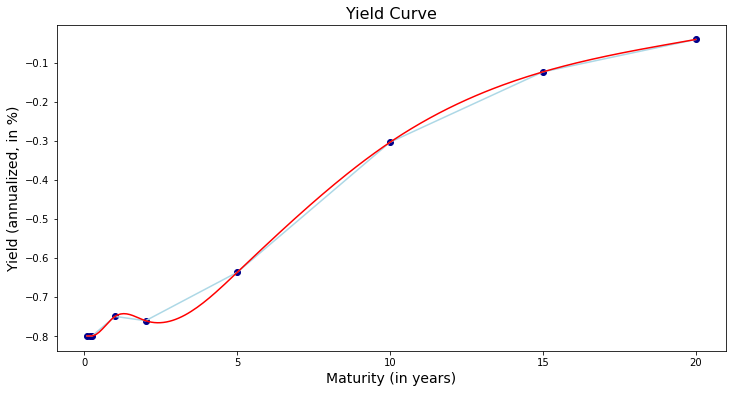

In [6]:
x = df_IR.index
x_new = np.linspace(x.min(), x.max(), 200) 
y = df_IR['IR']

spl = make_interp_spline(x, y, k = 3)
power_smooth = spl(x_new)

plt.figure(figsize = (12,6))
plt.plot(x, y, color = 'lightblue', label = 'Yield Curve (static)')
plt.scatter(x, y, marker = 'o', color = 'darkblue', label = 'Yields (annualized)')
plt.plot(x_new, power_smooth, color = 'red', label = 'Yield Curve (smoothed)')
plt.title("Yield Curve", size = 16)
plt.xlabel("Maturity (in years)", size = 14)
plt.ylabel("Yield (annualized, in %)", size = 14)
plt.xticks([0,5,10,15,20])
plt.show()

### b)

In [7]:
zero_coupon_prices = []
interest_rates = df_IR['IR'].to_numpy()
for i, j in zip(df_IR.index, range(0, len(df_IR.index))):
    zero_coupon_price = (1 + interest_rates[j]/100)**(-i)
    zero_coupon_prices.append(zero_coupon_price)
print(zero_coupon_prices)

[1.0006695717045604, 1.0013395917353884, 1.0020100603926707, 1.0075566750629723, 1.0153955160678871, 1.0324678167094652, 1.0309145303719804, 1.0187858157730447, 1.008235407389055]


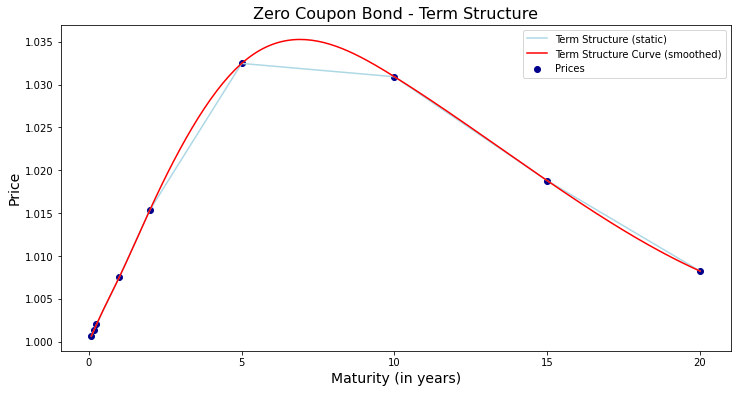

In [8]:
x = df_IR.index
x_new = np.linspace(x.min(), x.max(), 200)
y = zero_coupon_prices

spl = make_interp_spline(x, y, k = 3)
power_smooth = spl(x_new)

plt.figure(figsize = (12,6))
plt.plot(x, y, color = 'lightblue', label = 'Term Structure (static)')
plt.scatter(x, y, marker = 'o', color = 'darkblue', label = 'Prices')
plt.plot(x_new, power_smooth, color = 'red', label = 'Term Structure Curve (smoothed)')
plt.title("Zero Coupon Bond - Term Structure", size = 16)
plt.xlabel("Maturity (in years)", size = 14)
plt.ylabel("Price", size = 14)
plt.xticks([0,5,10,15,20])
plt.legend()
plt.show()

### c)

In [9]:
zc_curve = pd.DataFrame()
zc_curve['zero_coupon_price'] = zero_coupon_prices
zc_curve['tenor1'] = df_IR.index
zc_curve['tenor2'] = zc_curve['tenor1']**2
zc_curve['tenor3'] = zc_curve['tenor1']**3

In [10]:
# sm.OLS(y, X) y:=to be predicted, X:=matrix of features 
#CAPM regression
LR = sm.OLS(
    zc_curve['zero_coupon_price'].to_numpy(), 
    sm.add_constant(zc_curve[['tenor1', 'tenor2', 'tenor3']].to_numpy())
)
LR_results = LR.fit()
print(LR_results.summary())
print(LR_results.params)
#comment: const = a0; x1 = m; x2 = m^2; x3 = m^3 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     286.7
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           5.16e-06
Time:                        11:55:04   Log-Likelihood:                 50.570
No. Observations:                   9   AIC:                            -93.14
Df Residuals:                       5   BIC:                            -92.35
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9992      0.001   1500.942      0.0

/Users/jonashusmann/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


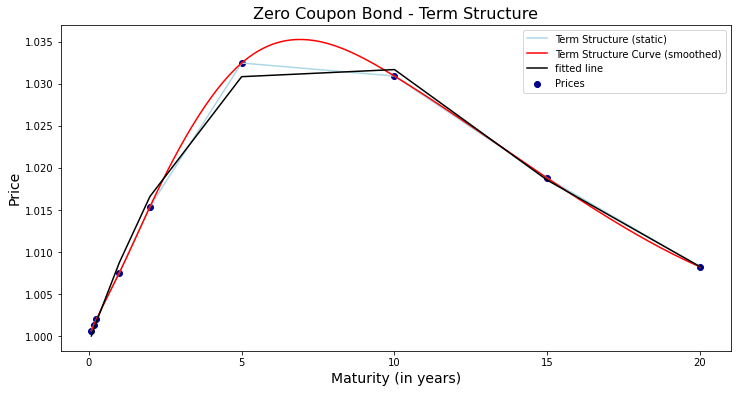

In [11]:
x = df_IR.index
x_new = np.linspace(x.min(), x.max(), 200)
y = zero_coupon_prices

spl = make_interp_spline(x, y, k = 3)
power_smooth = spl(x_new)

plt.figure(figsize = (12,6))
plt.plot(x, y, color = 'lightblue', label = 'Term Structure (static)')
plt.scatter(x, y, marker = 'o', color = 'darkblue', label = 'Prices')
plt.plot(x_new, power_smooth, color = 'red', label = 'Term Structure Curve (smoothed)')
plt.plot(x, LR_results.params[0] + np.matmul(LR_results.params[1:], zc_curve.iloc[:,1:].T), label='fitted line', c='black')
plt.title("Zero Coupon Bond - Term Structure", size = 16)
plt.xlabel("Maturity (in years)", size = 14)
plt.ylabel("Price", size = 14)
plt.xticks([0,5,10,15,20])
plt.legend()
plt.show()

### d)

In [20]:
LR_results.params[0] + np.matmul(LR_results.params[1:], zc_curve.iloc[:,1:].T)
LR_results.params

zc_bond_7 = (LR_results.params[0] + np.matmul(LR_results.params[1:], np.array([7,7**2,7**3]).T))*100
print(f"Value of a 7y Zero Coupon Bond: {round(zc_bond_7,5)}")

Value of a 7y Zero Coupon Bond: 103.39362


### e)

In [21]:
tenor_df = []

for i in [0.5,1,1.5,2,2.5,3]:
    tenor1 = ([i,i**2,i**3])
    tenor_df.append(tenor1)

zc_bonds = []
for i in range(0,6):
    zc_bond=LR_results.params[0] + np.matmul(LR_results.params[1:], tenor_df[i])
    zc_bonds.append(zc_bond)
zc_bonds = pd.DataFrame(zc_bonds)

tenor_df = pd.DataFrame(tenor_df)
m = pd.DataFrame(tenor_df.iloc[:, 0])

zc_bond_df = pd.DataFrame(zc_bonds)
#zc_bond_df['zc_bonds'] = zc_bonds
zc_bond_df['tenor'] = m

#print(zc_bonds)
#print(tenor_df)
#print(m)

#fitted_rates = []
fitted_rates = (zc_bonds**(-1/m) -1)*100
fitted_rates['tenor'] = tenor_df.iloc[:, 0]

#print(fitted_rates)
    

In [23]:
#replacing 1y and 2y fitted rates with the actual 1y and 2y rates from the data set
data_gvt = data_3.drop(['CORP_BBB_10Y','CORP_AA_10Y'], axis=1)
data_gvt.index = pd.to_datetime(data_gvt.index, format='%d.%m.%Y')
data_gvt = data_gvt.dropna()
fitted_rates.iloc[:,0].replace({fitted_rates.iloc[1,0]: data_gvt.iloc[-1,3], fitted_rates.iloc[3,0]: data_gvt.iloc[-1,4]}, inplace=True)

In [24]:
#semi-annual coupon bond with a maturity of three years, 
#paying 1/2 every 6 months (first payment in 6 months, last payment in three years)
# P(3) = sum(0.5/(1+y)**m)+100/(1+y)**M

df_rates_tenor = pd.DataFrame(m)
df_rates_tenor['fitted rates'] = pd.DataFrame(fitted_rates.iloc[:,0])/100
df_rates_tenor.rename(columns={0: 'tenor'}, inplace=True)

cpn_value = 0.5/(1+df_rates_tenor['fitted rates'])**df_rates_tenor['tenor']
face_value = 100/(1+df_rates_tenor['fitted rates'].iloc[-1])**df_rates_tenor['tenor'].iloc[-1]
pd.DataFrame(cpn_value)
#print(m)
#print(fitted_rates.iloc[:,0])

cpn_value.cumsum().iloc[-1]
sa_cpn_bond_3 = face_value + cpn_value.cumsum().iloc[-1]
print(f"Value of a 3y semi annual Coupon Bond: {round(sa_cpn_bond_3,5)}")


Value of a 3y semi annual Coupon Bond: 105.32263


### f)

In [16]:
# level = y10
# slope = y10 -y3m
# curvature = (y2-y3m) - (y10 - y2)
yld_curve = pd.DataFrame()
yld_curve['level'] = data_3.GVT_10Y
yld_curve['slope'] = data_3.GVT_10Y - data_3.GVT_3M
yld_curve['curvature'] = (data_3.GVT_2Y - data_3.GVT_3M) - (data_3.GVT_10Y - data_3.GVT_2Y)
yld_curve.index = pd.to_datetime(yld_curve.index, format='%d.%m.%Y')


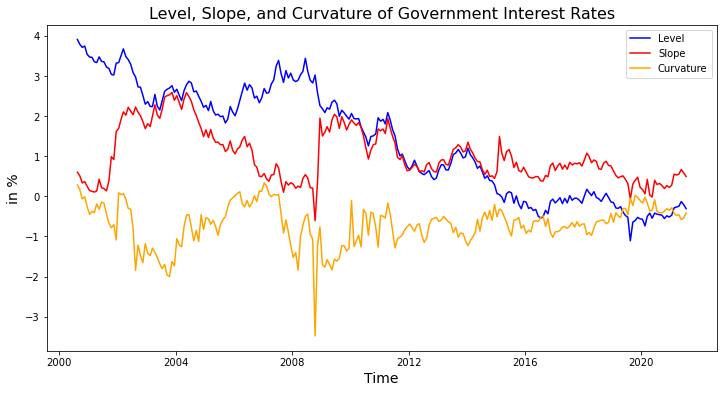

In [17]:
x = yld_curve.index
y1 = yld_curve['level']
y2 = yld_curve['slope']
y3 = yld_curve['curvature']


plt.figure(figsize = (12,6))
plt.plot(x, y1, color = 'blue', label = 'Level')
plt.plot(y2, color = 'red', label = 'Slope')
plt.plot(y3, color = 'orange', label = 'Curvature')
plt.title("Level, Slope, and Curvature of Government Interest Rates", size = 16)
plt.xlabel("Time", size = 14)
plt.ylabel("in %", size = 14)
plt.legend()
plt.show()

### e)

In [18]:
#CORP_AA_10Y - GVT_10Y
risk_premia = pd.DataFrame()
risk_premia['AA_rp'] = data_3.CORP_AA_10Y - data_3.GVT_10Y
risk_premia['BBB_rp'] = data_3.CORP_BBB_10Y - data_3.GVT_3M
risk_premia = risk_premia.dropna()
risk_premia.index = pd.to_datetime(risk_premia.index, format='%d.%m.%Y')

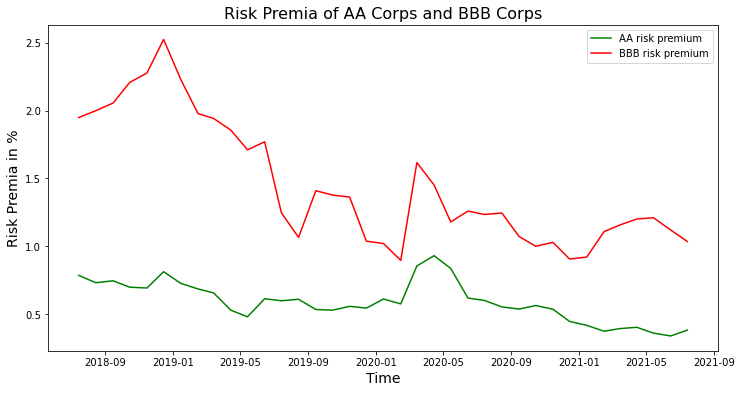

In [19]:
x = risk_premia.index
y1 = risk_premia['AA_rp']
y2 = risk_premia['BBB_rp']

plt.figure(figsize = (12,6))
plt.plot(x, y1, color = 'green', label = 'AA risk premium')
plt.plot(y2, color = 'red', label = 'BBB risk premium')
plt.title("Risk Premia of AA Corps and BBB Corps", size = 16)
plt.xlabel("Time", size = 14)
plt.ylabel("Risk Premia in %", size = 14)
plt.legend()
plt.show()